In [1]:
import numpy as np
import libraries as lib
import matplotlib.pyplot as plt 

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#  I. BOSTON HOUSING DATASET

## 1. Data Preparing

Import the Boston Housing dataset, with default defined predictors and targets.

In [2]:
# housing predictors, housing targets
housing_predic, housing_targ = lib.data_import("HousingData.csv")

Clean the imported dataset including filling the missing values, handling the categorical attributes and normalizing the predictor's values such that they can work well with the regression algorithm. The procedure will result in the preprocessed predictors and the preprocessed targets.

In [3]:
# preprocessed housing predictors, preprocessed housing targets
pre_hou_predic, pre_hou_targ = lib.data_cl(housing_predic,housing_targ)

Data Dimesion Reduction

- Data Visualization

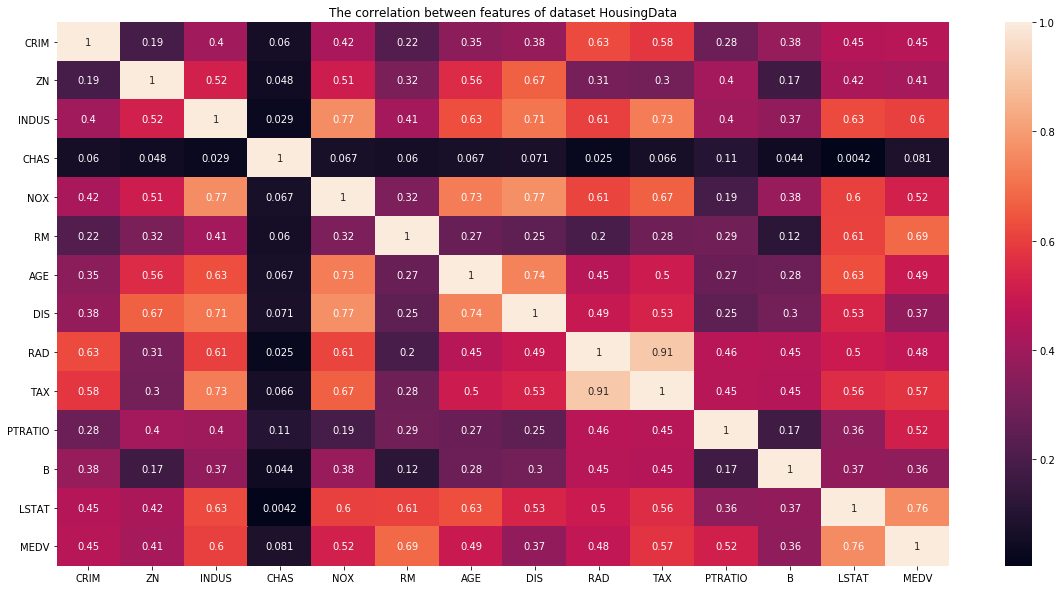

In [4]:
lib.feature_correlation('HousingData.csv')

+ We see that, there are several predictors used in the Boston Housing Dataset. Some of them are very correlated such as (INDUS and DIS), and some predictors are almost not correlated such as (Zn and B). In the conclusion, we have some rebundant informations in Dataset, to reduce this high dimension space to lower one we use the Priciple Component Analysis technique. 

- Dimension Reduction with PCA

- We reduce the dimension by using the PCA to keep 90% variances of the Dataset.

Number of acp components features=  13
cumsum variance explained=  [0.45819647 0.56643339 0.66414341 0.73120956 0.79620963 0.84751852
 0.89044955 0.92348518 0.9461763  0.96492196 0.98154345 0.99469887]
nb_component_features:  7


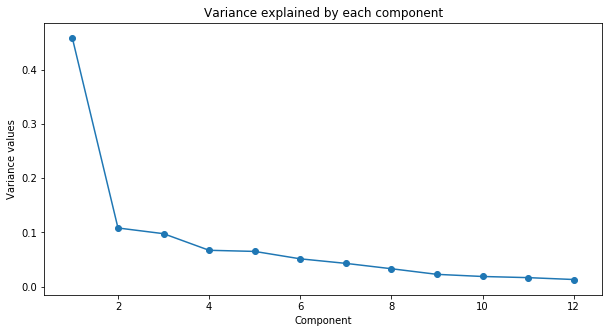

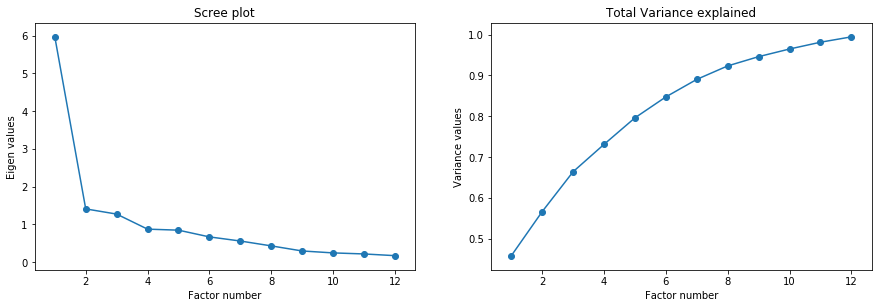

In [5]:
X_new,y = lib.Dimension_Reduction(pre_hou_predic,pre_hou_targ,to_plot = True)

- We figure out that by after doing PCA and keep only 8 dimensions we can obtain 92% variances of data. We reduced the 5 dimension but we can save a significant amount of data

Divide the Boston Housing Data into traing set and test set, and prepare the training set for cross-validation

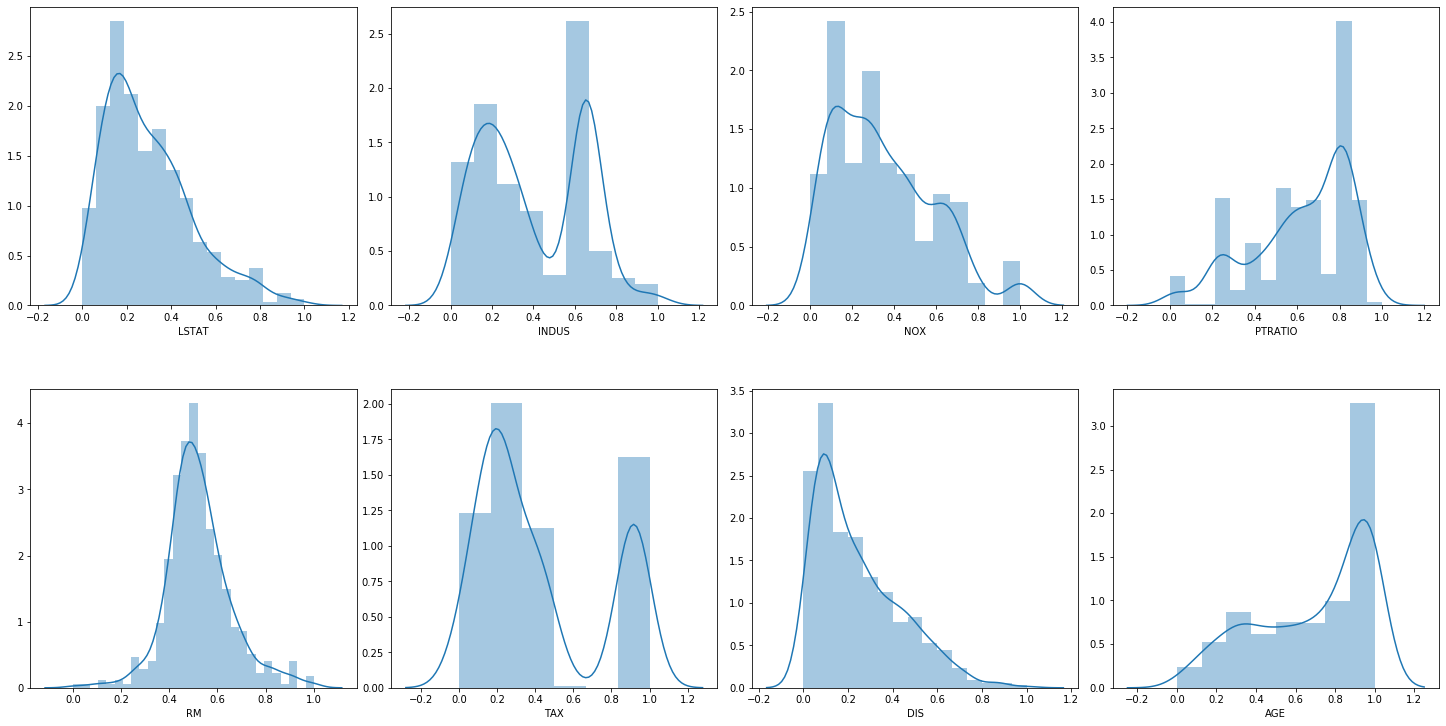

In [6]:
# house train set, house test set, house train cross validation, house test cross validation
#hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val = lib.data_split(X_new,y)
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
lib.dessin_distribution(pre_hou_predic, column_sels, 2, 4)
X = pre_hou_predic.loc[:,column_sels]
y = pre_hou_targ
hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val = lib.data_split(X.values, y.values)

## 2. Regression

### 2.1. Decsion Tree algorithm

We use the Decision Tree algorithm to predict the Housing price in Boston.

In [39]:
# initiate the model
tree = lib.decision_tree(max_depth = 10,min_samples_split = 7, min_samples_leaf = 5)

In [40]:
# feed the data to the model
lib.eval_lr(tree,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 2.9859
R2 score is: 0.8944
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 4.9468
R2 score is: 0.7074
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [2.9192, 2.996, 2.8289, 3.0391, 2.7667, 2.8336, 2.3182, 2.7382, 2.8878, 2.7745]
Cross-validation R2 score is 
 [0.9016, 0.8937, 0.906, 0.8909, 0.9078, 0.9036, 0.9347, 0.9098, 0.902, 0.9109]
Average RMSE is: 2.8102
Average R2 score is: 0.9061
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.7934, 4.5839, 4.13

#### Conclusion

- The model overfits the training set
- The cross-validation gives a good performance on the training set, but not good at all on the test set.

### 2.2. Random Forest

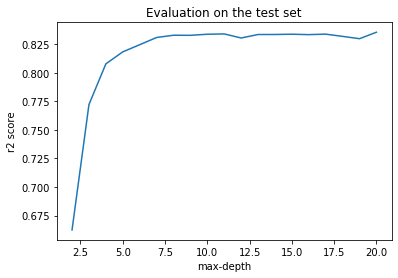

In [70]:
#fine tuning the ridge model
xlin = np.linspace(2,20,19)
ylin = np.zeros((19,1))
index = 0
for i in xlin:
    forest = lib.random_forest(n_estimators=1000,max_depth=i,min_samples_leaf=3)
    forest.fit(hou_trainset['X_train'],hou_trainset['y_train'])
    ylin[index] = forest.score(hou_testset['X_test'],hou_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.title('Evaluation on the test set')
plt.xlabel('max-depth')
plt.ylabel('r2 score')
plt.show()

In [10]:
# initiate the model
forest = lib.random_forest(n_estimators=1000,max_depth=10,min_samples_leaf=3)
# feed the data to the model
lib.eval_lr(forest,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 2.4969
R2 score is: 0.9261
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 3.6998
R2 score is: 0.8363
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [2.4038, 2.3709, 2.2892, 2.2728, 2.2908, 2.2959, 2.1234, 2.3446, 2.3482, 2.31]
Cross-validation R2 score is 
 [0.9333, 0.9334, 0.9385, 0.939, 0.9368, 0.9367, 0.9452, 0.9339, 0.9352, 0.9382]
Average RMSE is: 2.3050
Average R2 score is: 0.9370
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.7624, 3.7019, 3.28

#### Conclusion

- The model still overfits the training set
- The cross-validation gives a good performance on the training set, but not good at all on the test set.

### 2.3. Linear Regression algorithm

In [11]:
lr = lib.lr_model()
# feed the data to the model
lib.eval_lr(lr ,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 4.9939
R2 score is: 0.7045
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.2233
R2 score is: 0.6737
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.1417, 4.9045, 5.1133, 4.9952, 4.8952, 5.0203, 4.9519, 5.1114, 5.0866, 4.9656]
Cross-validation R2 score is 
 [0.6948, 0.7151, 0.6929, 0.7052, 0.7114, 0.6973, 0.7021, 0.6857, 0.696, 0.7146]
Average RMSE is: 5.0186
Average R2 score is: 0.7015
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.8599, 6.1079, 4.

### 2.4 Ridge Regression algorithm

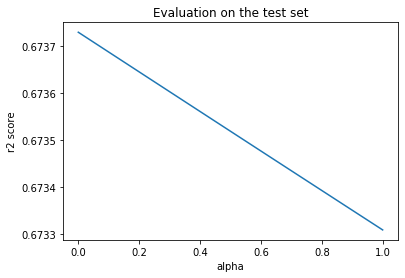

In [69]:
#fine tuning the ridge model
xlin = np.linspace(0,1,10)
ylin = np.zeros((10,1))
index = 0
for i in xlin:
    ridge = lib.ridge_model(alpha=i)
    ridge.fit(hou_trainset['X_train'],hou_trainset['y_train'])
    ylin[index] = ridge.score(hou_testset['X_test'],hou_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.title('Evaluation on the test set')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

As we can see the ridge model performs the best with alpha = 0.1


In [13]:
ridge = lib.ridge_model(alpha=0.1)
lib.eval_lr(ridge,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 4.9939
R2 score is: 0.7045
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.2236
R2 score is: 0.6737
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.1417, 4.9045, 5.1133, 4.9952, 4.8952, 5.0203, 4.9519, 5.1114, 5.0866, 4.9656]
Cross-validation R2 score is 
 [0.6948, 0.7151, 0.6929, 0.7052, 0.7114, 0.6973, 0.7021, 0.6857, 0.696, 0.7146]
Average RMSE is: 5.0186
Average R2 score is: 0.7015
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.8596, 6.1077, 4.

### 2.5 Lasso Regression algorithm

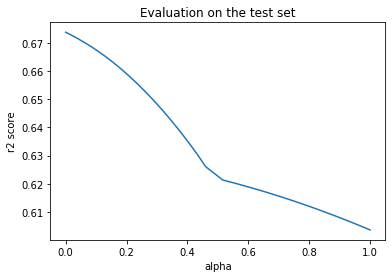

In [68]:
#fine tuning the lasso model
xlin = np.linspace(0,1,1000)
ylin = np.zeros((1000,1))
index = 0
for i in xlin:
    lasso = lib.lasso(alpha=i)
    lasso.fit(hou_trainset['X_train'],hou_trainset['y_train'])
    ylin[index] = lasso.score(hou_testset['X_test'],hou_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.title('Evaluation on the test set')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

As we can see the lasso model performs the best with alpha = 0.001

In [15]:
lasso = lib.lasso(alpha=0.4)
lib.eval_lr(lasso,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 5.1640
R2 score is: 0.6840
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.5230
R2 score is: 0.6352
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.2981, 5.0845, 5.2808, 5.1664, 5.0619, 5.2017, 5.1168, 5.2718, 5.2549, 5.1378]
Cross-validation R2 score is 
 [0.676, 0.6938, 0.6725, 0.6847, 0.6914, 0.675, 0.6819, 0.6656, 0.6755, 0.6945]
Average RMSE is: 5.1875
Average R2 score is: 0.6811
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.8851, 6.166, 4.92

### 2.6 SVR Linear algorithm

In [16]:
#the SVR Linear model has no hyperparameter to fine tune
svr_linear = lib.svr_linear_model()
lib.eval_lr(svr_linear,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 5.1800
R2 score is: 0.6821
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 5.6437
R2 score is: 0.6191
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [5.4097, 5.0946, 5.3407, 5.233, 5.0734, 5.2533, 5.176, 5.3387, 5.3702, 5.2192]
Cross-validation R2 score is 
 [0.6622, 0.6926, 0.665, 0.6765, 0.69, 0.6685, 0.6745, 0.6571, 0.6611, 0.6847]
Average RMSE is: 5.2509
Average R2 score is: 0.6732
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.8116, 6.7316, 3.8619

### 2.7 SVR rbf algorithm

In [17]:
#the SVR rbf model has no hyperparameter to fine tune
svr_rbf = lib.svr_rbf_model()
lib.eval_lr(svr_rbf,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 4.7760
R2 score is: 0.7297
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 4.8227
R2 score is: 0.7219
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [4.814, 4.6862, 4.8043, 4.6468, 4.5842, 4.6827, 4.7971, 4.8298, 4.7218, 4.6521]
Cross-validation R2 score is 
 [0.7325, 0.7399, 0.7289, 0.7449, 0.7469, 0.7366, 0.7205, 0.7193, 0.738, 0.7495]
Average RMSE is: 4.7219
Average R2 score is: 0.7357
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [3.4053, 5.1418, 4.2

### 2.8 KNN

The best r2 score is  0.8070046690710674
The best n_neighbors is  3


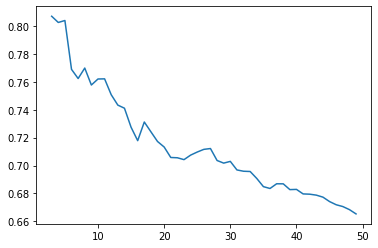

In [18]:
#Take X, y from trainset and testset 
X_train = hou_trainset['X_train']
y_train = hou_trainset['y_train']
X_test = hou_testset['X_test']
y_test = hou_testset['y_test']
n_neighors = lib.tunning_knn(X_train, y_train, X_test, y_test)

In [19]:
knn = lib.knn(n_neighors)
lib.eval_lr(knn ,hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 3.1246
R2 score is: 0.8843
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 4.0173
R2 score is: 0.8070
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [2.8876, 3.0068, 2.9581, 2.9189, 2.7035, 2.6375, 2.7498, 3.1965, 2.8685, 2.9617]
Cross-validation R2 score is 
 [0.9037, 0.8929, 0.8972, 0.8993, 0.912, 0.9164, 0.9081, 0.8771, 0.9033, 0.8985]
Average RMSE is: 2.8889
Average R2 score is: 0.9009
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [2.9201, 4.1443, 3.

## 3. Result comparison

As we can see that the random forest algorithm performs the best on Boston Housing dataset.

Text(0, 0.5, 'r2 score')

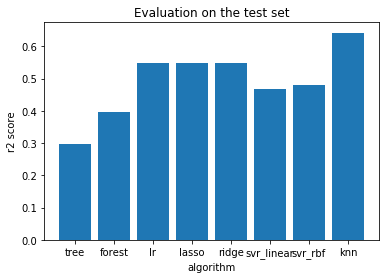

In [63]:
r2_scores=[]
model = [tree, forest, lr, lasso, ridge, svr_linear, svr_rbf, knn]
model_name= ['tree', 'forest', 'lr', 'lasso', 'ridge', 'svr_linear', 'svr_rbf', 'knn']
for i in model:
    i.fit(X_train, y_train)
    r2_scores.append(i.score(X_test, y_test))
plt.bar(model_name, r2_scores)
plt.title('Evaluation on the test set')
plt.xlabel('algorithm')
plt.ylabel('r2 score')

#  II.  PROSATE CANCER DATASET

## 1. Data Preparing

In [55]:
prostate_predic, prostate_targ = lib.data_import("prostate.data")

In [56]:
# preprocessed housing predictors, preprocessed housing targets
pre_pro_predic, pre_pro_targ = lib.data_cl(prostate_predic,prostate_targ)

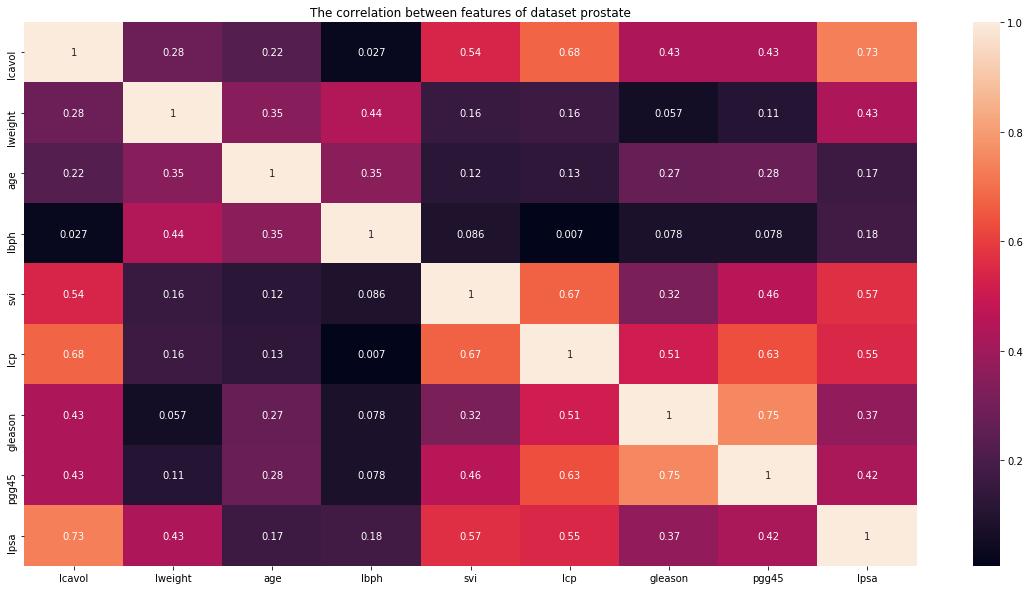

In [57]:
lib.feature_correlation('prostate.data')

In [59]:
X_new,y = lib.Dimension_Reduction(pre_pro_predic,pre_pro_targ,to_plot = False)

Number of acp components features=  8
cumsum variance explained=  [0.42009315 0.62613144 0.74808907 0.82709046 0.88750182 0.94277844
 0.97560642 1.        ]
nb_component_features:  5


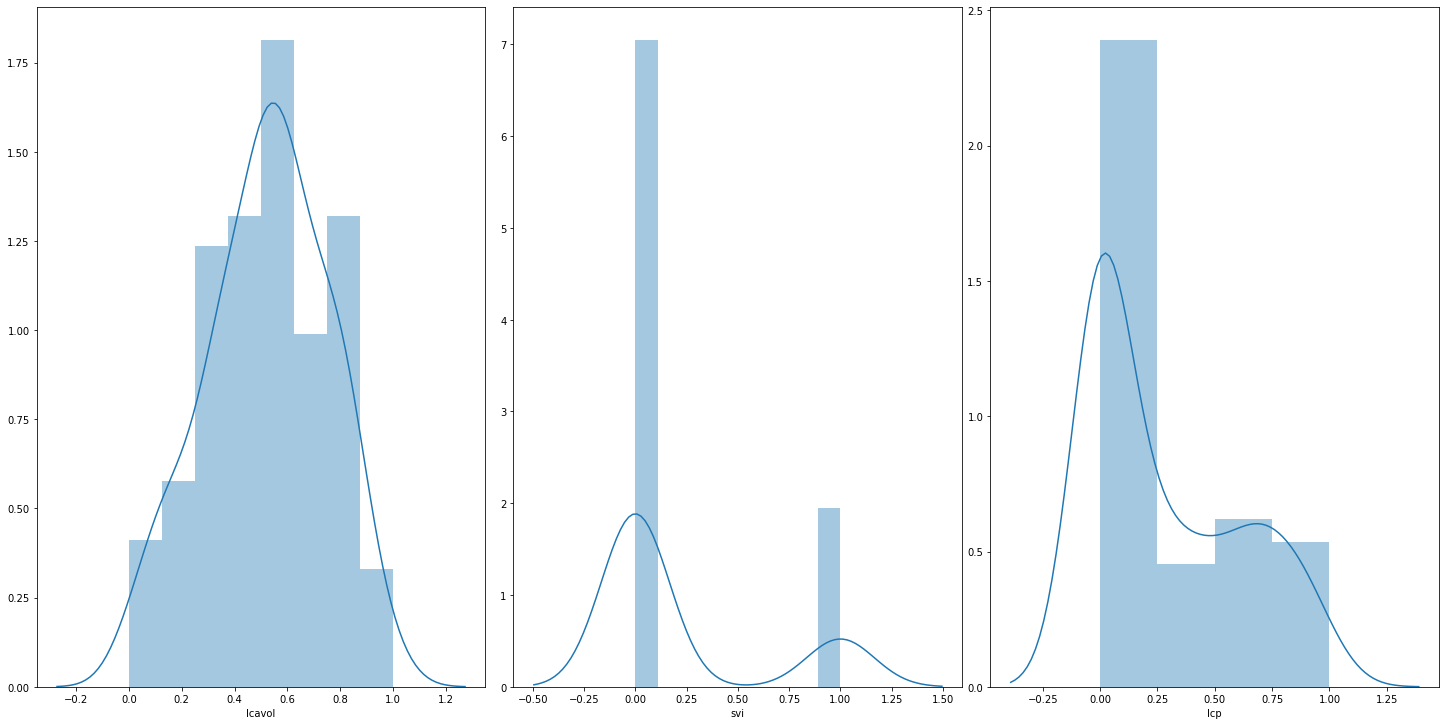

In [24]:
# house train set, house test set, house train cross validation, house test cross validation
#hou_trainset, hou_testset, hou_train_crs_val, hou_test_crs_val = lib.data_split(X_new,y)
column_sels = ['lcavol', 'svi', 'lcp']
lib.dessin_distribution(pre_pro_predic, column_sels, 1, 3)
X = pre_pro_predic.loc[:,column_sels]
y = pre_pro_targ
pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val = lib.data_split(X.values, y.values, k=3)

## 2. Regression

### 2.1. Decsion Tree algorithm

We use the Decision Tree algorithm to predict the prostate.

In [51]:
# initiate the model
tree = lib.decision_tree(max_depth = 10,min_samples_split = 5, min_samples_leaf = 12)

In [52]:
# feed the data to the model
lib.eval_lr(tree,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7569
R2 score is: 0.5577
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.9894
R2 score is: 0.2982
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.7911, 0.7751, 0.7384]
Cross-validation R2 score is 
 [0.5152, 0.5533, 0.5794]
Average RMSE is: 0.7682
Average R2 score is: 0.5493
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.8613, 0.8335, 1.031]
Cross-validation R2 score is 
 [0.4566, 0.4305, 0.1651]
Average RMSE is: 0.9086
Average R2 score is: 0.350

### 2.2. Random Forest

Text(0, 0.5, 'r2 score')

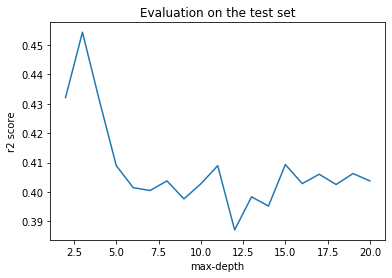

In [65]:
#fine tuning the ridge model
xlin = np.linspace(2,20,19)
ylin = np.zeros((19,1))
index = 0
for i in xlin:
    forest = lib.random_forest(n_estimators=1000,max_depth=i,min_samples_leaf=3)
    forest.fit(pro_trainset['X_train'],pro_trainset['y_train'])
    ylin[index] = forest.score(pro_testset['X_test'],pro_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.title('Evaluation on the test set')
plt.xlabel('max-depth')
plt.ylabel('r2 score')

In [28]:
# initiate the model
forest = lib.random_forest(n_estimators=1000,max_depth=10,min_samples_leaf=3)
# feed the data to the model
lib.eval_lr(forest,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.5617
R2 score is: 0.7564
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.9230
R2 score is: 0.3892
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.5484, 0.6011, 0.5451]
Cross-validation R2 score is 
 [0.767, 0.7313, 0.7708]
Average RMSE is: 0.5649
Average R2 score is: 0.7564
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.8241, 0.6934, 0.9317]
Cross-validation R2 score is 
 [0.5025, 0.6058, 0.3183]
Average RMSE is: 0.8164
Average R2 score is: 0.475

### 2.3. Linear Regression algorithm

In [29]:
lr = lib.lr_model()
# feed the data to the model
lib.eval_lr(lr ,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7317
R2 score is: 0.5866
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.7939
R2 score is: 0.5481
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.7258, 0.7591, 0.7063]
Cross-validation R2 score is 
 [0.5919, 0.5716, 0.6151]
Average RMSE is: 0.7304
Average R2 score is: 0.5929
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.7899, 0.7279, 0.8995]
Cross-validation R2 score is 
 [0.5429, 0.5657, 0.3645]
Average RMSE is: 0.8058
Average R2 score is: 0.49

### 2.4 Ridge Regression algorithm

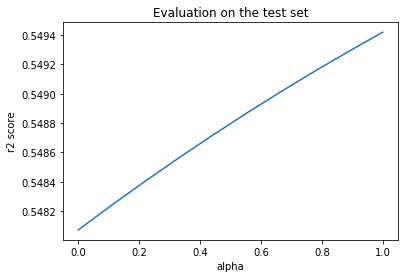

In [66]:
#fine tuning the ridge model
xlin = np.linspace(0,1,10)
ylin = np.zeros((10,1))
index = 0
for i in xlin:
    ridge = lib.ridge_model(alpha=i)
    ridge.fit(pro_trainset['X_train'],pro_trainset['y_train'])
    ylin[index] = ridge.score(pro_testset['X_test'],pro_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.title('Evaluation on the test set')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [31]:
ridge = lib.ridge_model(alpha=0.1)
lib.eval_lr(ridge,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7317
R2 score is: 0.5866
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.7938
R2 score is: 0.5482
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.7258, 0.7591, 0.7063]
Cross-validation R2 score is 
 [0.5919, 0.5716, 0.6151]
Average RMSE is: 0.7304
Average R2 score is: 0.5929
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.7895, 0.7274, 0.8998]
Cross-validation R2 score is 
 [0.5433, 0.5663, 0.3641]
Average RMSE is: 0.8056
Average R2 score is: 0.49

### 2.5 Lasso Regression algorithm

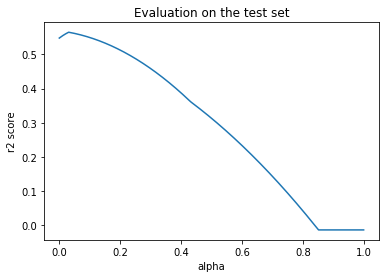

In [67]:
#fine tuning the lasso model
xlin = np.linspace(0,1,1000)
ylin = np.zeros((1000,1))
index = 0
for i in xlin:
    lasso = lib.lasso(alpha=i)
    lasso.fit(pro_trainset['X_train'],pro_trainset['y_train'])
    ylin[index] = lasso.score(pro_testset['X_test'],pro_testset['y_test'])
    index +=1
    
plt.plot(xlin,ylin)
plt.title('Evaluation on the test set')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [33]:
lasso = lib.lasso(alpha=0.001)
lib.eval_lr(lasso,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7317
R2 score is: 0.5866
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.7933
R2 score is: 0.5487
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.7258, 0.7591, 0.7063]
Cross-validation R2 score is 
 [0.5919, 0.5716, 0.6151]
Average RMSE is: 0.7304
Average R2 score is: 0.5929
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.7894, 0.727, 0.8993]
Cross-validation R2 score is 
 [0.5435, 0.5667, 0.3649]
Average RMSE is: 0.8052
Average R2 score is: 0.491

### 2.6 SVR Linear algorithm

In [34]:
#the SVR Linear model has no hyperparameter to fine tune
svr_linear = lib.svr_linear_model()
lib.eval_lr(svr_linear,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7643
R2 score is: 0.5490
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.8607
R2 score is: 0.4689
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.7358, 0.795, 0.7297]
Cross-validation R2 score is 
 [0.5807, 0.5301, 0.5892]
Average RMSE is: 0.7535
Average R2 score is: 0.5667
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.8079, 0.7932, 0.845]
Cross-validation R2 score is 
 [0.5219, 0.4842, 0.4392]
Average RMSE is: 0.8154
Average R2 score is: 0.4818

### 2.7 SVR rbf algorithm

In [35]:
#the SVR rbf model has no hyperparameter to fine tune
svr_rbf = lib.svr_rbf_model()
lib.eval_lr(svr_rbf,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7561
R2 score is: 0.5586
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.8510
R2 score is: 0.4808
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.7068, 0.788, 0.7334]
Cross-validation R2 score is 
 [0.6131, 0.5383, 0.585]
Average RMSE is: 0.7427
Average R2 score is: 0.5788
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.8771, 0.7827, 0.8743]
Cross-validation R2 score is 
 [0.4364, 0.4977, 0.3996]
Average RMSE is: 0.8447
Average R2 score is: 0.4446

### 2.8 KNN

The best r2 score is  0.6417440220409021
The best n_neighbors is  4


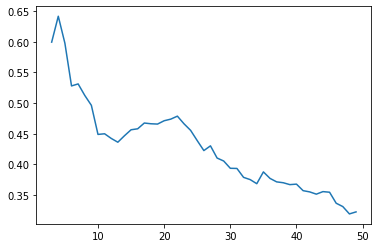

In [36]:
#Take X, y from trainset and testset 
X_train = pro_trainset['X_train']
y_train = pro_trainset['y_train']
X_test = pro_testset['X_test']
y_test = pro_testset['y_test']
n_neighors = lib.tunning_knn(X_train, y_train, X_test, y_test)

In [37]:
knn = lib.knn(n_neighors)
lib.eval_lr(knn ,pro_trainset, pro_testset, pro_train_crs_val, pro_test_crs_val)

----------------------------------------
|The model performance for training set|
---------------------------------------
RMSE is: 0.7014
R2 score is: 0.6201
------------------------------------
|The model performance for test set|
------------------------------------
RMSE is: 0.7069
R2 score is: 0.6417
----------------------------------------------------------------
|The cross validation of the model performance for training set|
----------------------------------------------------------------
Cross-validation RMSE is 
 [0.6086, 0.6771, 0.6353]
Cross-validation R2 score is 
 [0.7131, 0.6592, 0.6887]
Average RMSE is: 0.6403
Average R2 score is: 0.6870
------------------------------------------------------------
|The cross validation of the model performance for test set|
------------------------------------------------------------
Cross-validation RMSE is 
 [0.8669, 0.7431, 0.9607]
Cross-validation R2 score is 
 [0.4495, 0.5473, 0.2752]
Average RMSE is: 0.8569
Average R2 score is: 0.42

## 3. Result comparison

Text(0, 0.5, 'r2 score')

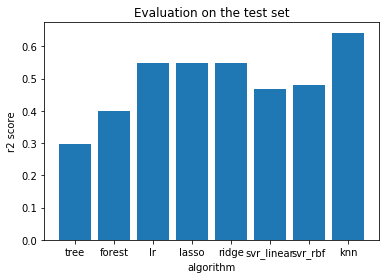

In [62]:
r2_scores=[]
model = [tree, forest, lr, lasso, ridge, svr_linear, svr_rbf, knn]
model_name= ['tree', 'forest', 'lr', 'lasso', 'ridge', 'svr_linear', 'svr_rbf', 'knn']
for i in model:
    i.fit(X_train, y_train)
    r2_scores.append(i.score(X_test, y_test))
plt.bar(model_name, r2_scores)
plt.title('Evaluation on the test set')
plt.xlabel('algorithm')
plt.ylabel('r2 score')